# Step 1 : Business Problem Understanding
    - group the employees based on their years_of_experience and salary

In [1]:
import numpy as np  # For Mathematical Calculations
import pandas as pd  # for Data Analysis
import matplotlib.pyplot as plt  # for Data Visualization
import seaborn as sns  # for Data Visualization
import warnings
warnings.simplefilter("ignore")  # Handeling Warnings

# Step 2 : Data Understanding

In [2]:
df = pd.read_csv("Salary Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
# Backup copy of Data

df_copy = df

In [4]:
df.shape

(375, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [13]:
df.columns.tolist()

['Age',
 'Gender',
 'Education Level',
 'Job Title',
 'Years of Experience',
 'Salary']

In [15]:
df.rename(columns={"Education Level":"Education_level", "Job Title": "Job_title", 
                   "Years of Experience":"Years_of_experience"}, inplace=True)

In [26]:
continous = ["Age", "Years_of_experience", "Salary"]

categorical = ["Gender", "Education_level", "Job_title"]

In [19]:
df[continous].describe()

,Age,Years_of_experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [20]:
df[continous].skew()

Age                    0.197522
Years_of_experience    0.361220
Salary                 0.400578
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

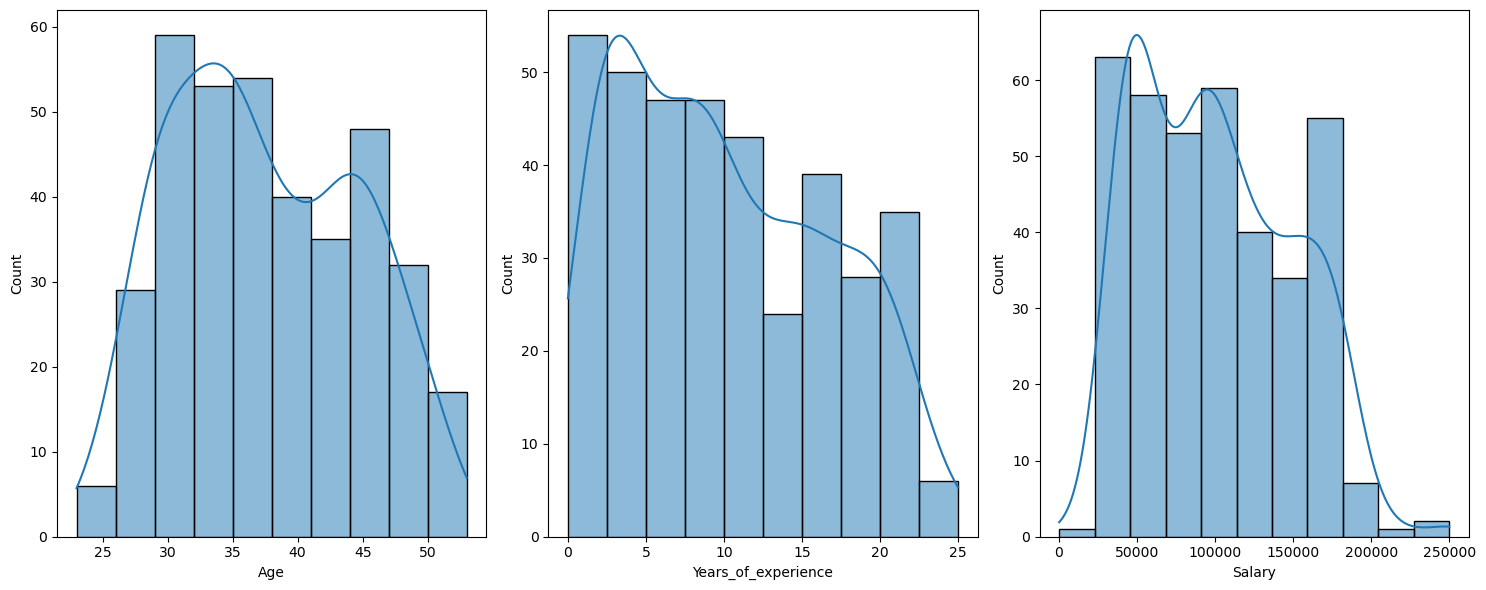

In [23]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
sns.histplot(df["Age"], kde=True)

plt.subplot(1,3,2)
sns.histplot(df["Years_of_experience"], kde=True)

plt.subplot(1,3,3)
sns.histplot(df["Salary"], kde=True)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

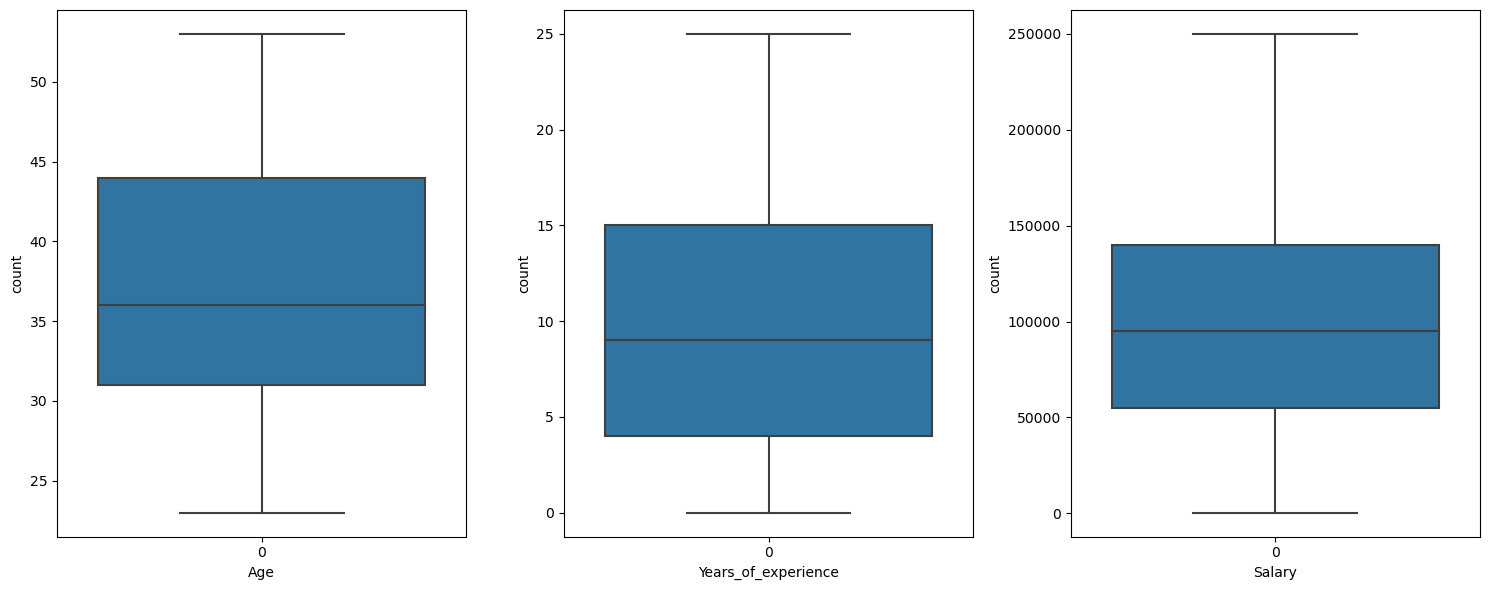

In [25]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
sns.boxplot(df["Age"])
plt.xlabel("Age")
plt.ylabel("count")

plt.subplot(1,3,2)
sns.boxplot(df["Years_of_experience"])
plt.xlabel("Years_of_experience")
plt.ylabel("count")

plt.subplot(1,3,3)
sns.boxplot(df["Salary"])
plt.xlabel("Salary")
plt.ylabel("count")

plt.tight_layout()
plt.show

In [28]:
df[categorical].nunique()

Gender               2
Education_level      3
Job_title          174
dtype: int64

In [42]:
def value_count(columns):
    for i in columns:
        print(f"Value Count of {i} is :",df[i].value_counts())
        print()
    
columns = df[categorical]
value_count(columns)

Value Count of Gender is : Gender
Male      194
Female    179
Name: count, dtype: int64

Value Count of Education_level is : Education_level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

Value Count of Job_title is : Job_title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64



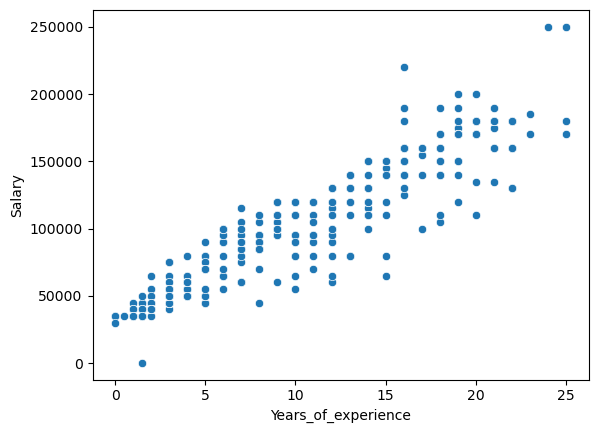

In [50]:
sns.scatterplot(x="Years_of_experience", y="Salary", data=df)
plt.show()

# Step 3 : Data Preprocessing

In [43]:
df.isnull().sum()

Age                    2
Gender                 2
Education_level        2
Job_title              2
Years_of_experience    2
Salary                 2
dtype: int64

In [44]:
df.dropna(inplace=True)

In [45]:
df.isnull().sum()

Age                    0
Gender                 0
Education_level        0
Job_title              0
Years_of_experience    0
Salary                 0
dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Gender"] = le.fit_transform(df[["Gender"]])
df["Education_level"] = le.fit_transform(df[["Education_level"]])
df["Job_title"] = le.fit_transform(df[["Job_title"]])

In [52]:
df.duplicated().sum()

49

In [53]:
df[df.duplicated()]

,Age,Gender,Education_level,Job_title,Years_of_experience,Salary
195,28.0,1,0,49,2.0,40000.0
250,30.0,0,0,63,2.0,40000.0
251,38.0,1,1,127,9.0,110000.0
252,45.0,0,2,139,15.0,150000.0
253,28.0,1,0,50,2.0,40000.0
254,35.0,0,0,131,8.0,85000.0
255,44.0,1,0,153,14.0,130000.0
256,34.0,0,1,117,6.0,100000.0
257,35.0,1,0,143,9.0,95000.0
258,50.0,0,2,30,22.0,180000.0


# Step 4 : Modelling

### 1. KMeans

In [54]:
X = df

In [56]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init="k-means++")
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[865681630695.8738, 236775418604.2426, 94778246698.58426, 58406645952.659195, 42101958485.462776, 31305199481.15898, 20542349532.996307, 15926649094.012384, 12741080624.679487, 10822260253.127007]


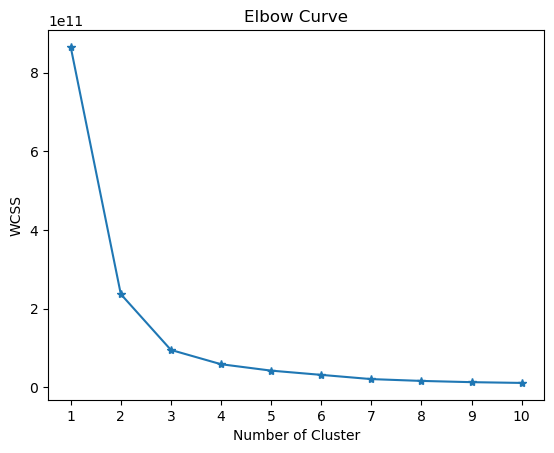

In [57]:
plt.plot(range(1, 11), wcss, marker="*")
plt.xticks(range(1, 11))
plt.title("Elbow Curve")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [58]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=True)

df["km_predicted"] = kmeans.fit_predict(X)

In [61]:
df["km_predicted"].unique()

array([0, 2, 1])

In [62]:
df["km_predicted"].value_counts()

km_predicted
0    137
2    135
1    101
Name: count, dtype: int64

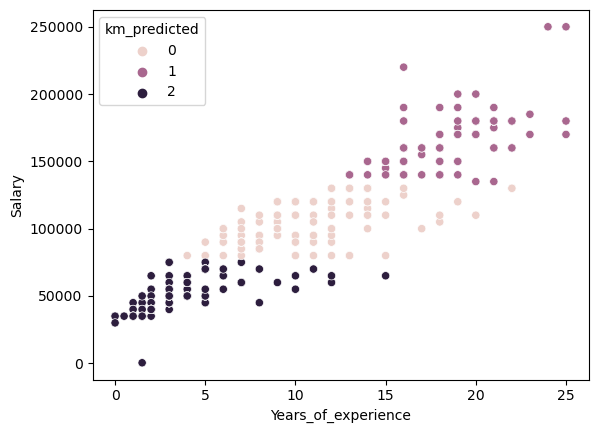

In [63]:
sns.scatterplot(x = "Years_of_experience", y = "Salary", data = X, hue=df["km_predicted"])
plt.show()

#### 3 Clusters are formed in the above Dataset by using KMeans Clustering

- **1. Empolyee's whose "Years_of_Experience" is less they have less "Salary"**
- **2. Empolyee's whose "Years_of_Experience" is Average they have less/Average "Salary"**
- **3. Empolyee's whose "Years_of_Experience" is high they have high "Salary"**

### 2. Hierarchical Clustering

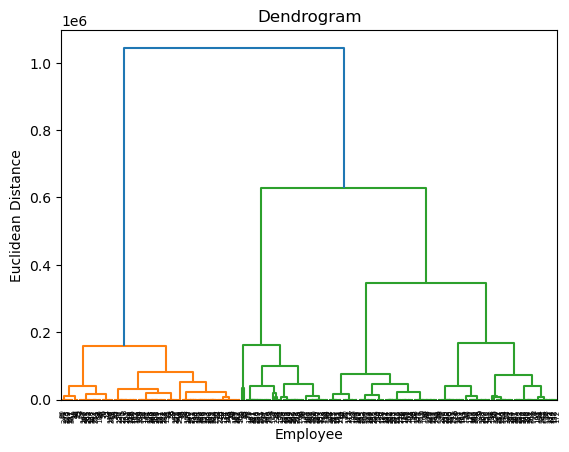

In [66]:
import scipy.cluster.hierarchy as sch

data = sch.linkage(X, method="ward")

dendrogram = sch.dendrogram(data)
plt.title("Dendrogram")
plt.xlabel("Employee")
plt.ylabel("Euclidean Distance")
plt.show()

In [69]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

df["hc_predicted"] = hc.fit_predict(X)

In [70]:
df["hc_predicted"].unique()

array([0, 1, 2], dtype=int64)

In [71]:
df["hc_predicted"].value_counts()

hc_predicted
0    172
1    135
2     66
Name: count, dtype: int64

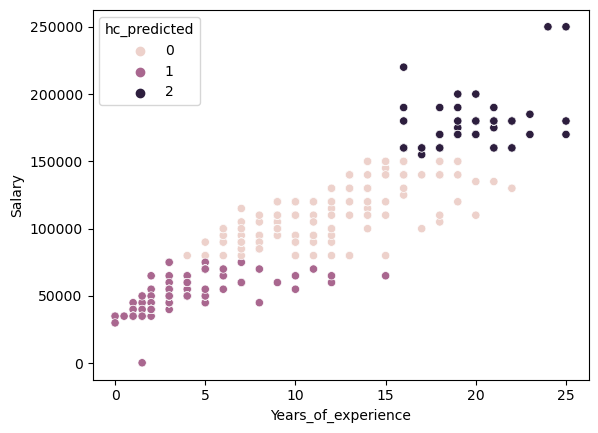

In [72]:
sns.scatterplot(x = "Years_of_experience", y = "Salary", data = X, hue=df["hc_predicted"])
plt.show()

### 3. DBSCAN

In [76]:
from sklearn.cluster import DBSCAN

for r in range(1, 11):         # Radius
    for m in range(3, 11):     # Minimum Samples
        dbs = DBSCAN(eps=r, min_samples=m)
        df["db_predicted"] = dbs.fit_predict(X)
        
    if df["db_predicted"].nunique() == 3:
        break
        
print("eps:", r)
print("min_samples:", m)

eps: 4
min_samples: 10


In [77]:
dbs = DBSCAN(eps=4, min_samples=10)

df["db_predicted"] = dbs.fit_predict(X)

In [78]:
df["db_predicted"].unique()

array([-1,  1,  0], dtype=int64)

In [80]:
df["db_predicted"].value_counts()

db_predicted
-1    348
 1     15
 0     10
Name: count, dtype: int64

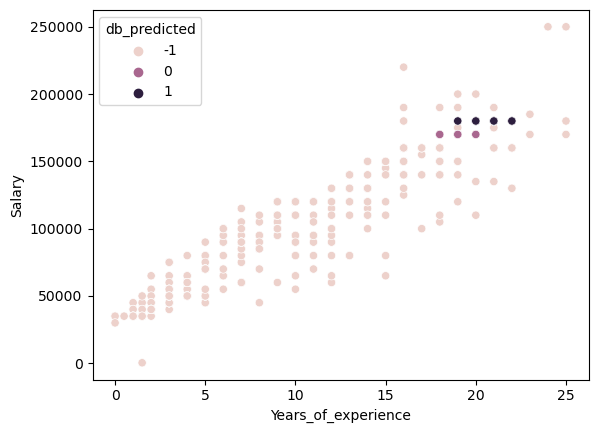

In [79]:
sns.scatterplot(x = "Years_of_experience", y = "Salary", data = X, hue=df["db_predicted"])
plt.show()

- **KMeans clustering is the best suitable algorithm for above dataset**
- **It predicted 3 clusters based on input data and group the similar employee in cluster**
- **By applying Hierarchical Clustering we can Understand which 2 record are near**